# Exploratory Notebook for Aviation Project, Group 4



In [1]:
#Bring in packages for analysis.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Importing the Avaiation Data set 

df = pd.read_csv("data/AviationData.csv", encoding='ISO-8859-1', low_memory=False)

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.info()

In [ ]:
#    commenting this out for now   

#This is not especially  helpful. It seemed more efficient than looking at each var 1 by 1, but it's too much info to weed through all together.
  
#for v in df.columns:
 #   print(df[v].value_counts())

In [ ]:
df.isna().sum()

In [3]:
# Here we are creating a new column for the event year pulling the year from the even date column

df['Event.Year'] = pd.DatetimeIndex(df['Event.Date']).year

In [4]:
# Filtering the events to only occur after the year of 2000, you can see below that our data set has decreased from 88889 down to 41214

df = df[df['Event.Year'] >= 2000]

In [ ]:
df

In [5]:
# Now that the events have been filtered out to only show the data after 2000 we are dropping any columns that are not needed

df = df.drop(columns=['Latitude', 'Longitude', 'Report.Status', 'Airport.Code', 
                'Airport.Name', 'Registration.Number', 'Number.of.Engines', 'Engine.Type',
                'FAR.Description', 'Schedule', 'Air.carrier', 'Broad.phase.of.flight',
                'Report.Status', 'Publication.Date', 'Location']) 

In [6]:
# Removing any aircrafts that were amateur built
df.drop(df.index[df["Amateur.Built"] == "Yes"], inplace=True) 

# Removing any countries outside of the United States because we only want to look at domestic flights
df.drop(df.index[df["Country"] != "United States"], inplace=True)

# Removing any aircrafts that are not categorized under airplane
df.drop(df.index[df["Aircraft.Category"] != "Airplane"], inplace=True)

# Removing any aircrafts that are missing either the make or the model
df.drop(df.index[df['Make'].isna()], inplace = True)
df.drop(df.index[df['Model'].isna()], inplace =True)

In [ ]:
df['Make'].value_counts()

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [7]:
df['Make'] = df['Make'].astype(str)
df['Make'] = df['Make'].str.capitalize()

In [8]:
df['Model'] = df['Model'].astype(str)
df['Model'] = df['Model'].str.upper()

In [9]:
df["Make"] = df["Make"].replace ("Air tractor inc", "Air tractor")
df["Make"] = df["Make"].replace ("Air tractor inc.", "Air tractor")
df["Make"] = df["Make"].replace ("Airbus industrie", "Airbus")
df["Make"] = df["Make"].replace ("American aviation", "American")
df["Make"] = df["Make"].replace ("American aviation corp. (aac)", "American")
df["Make"] = df["Make"].replace ("American champion (acac)", "American champion")
df["Make"] = df["Make"].replace ("American champion aircraft)", "American champion")
df["Make"] = df["Make"].replace ("American legend aircraft co", "American legend")
df["Make"] = df["Make"].replace ("Aviat aircraft inc", "Aviat")
df["Make"] = df["Make"].replace ("Aviat inc", "Aviat")
df["Make"] = df["Make"].replace ("Ayres corporation", "Ayres")
df["Make"] = df["Make"].replace ("Boeing stearman", "Boeing")
df["Make"] = df["Make"].replace ("Boeing company", "Boeing")
df["Make"] = df["Make"].replace ("The boeing company", "Boeing")
df["Make"] = df["Make"].replace ("Bombardier, inc.", "Bombardier")
df["Make"] = df["Make"].replace ("Britten-norman", "Britten norman")
df["Make"] = df["Make"].replace ("Cessna aircraft", "Cessna")
df["Make"] = df["Make"].replace ("Cessna aircraft co", "Cessna")
df["Make"] = df["Make"].replace ("Cessna aircraft company", "Cessna")
df["Make"] = df["Make"].replace ("Christen industries inc", "Christen industries")
df["Make"] = df["Make"].replace ("Cirrus design corp.", "Cirrus")
df["Make"] = df["Make"].replace ("Cirrus design corp", "Cirrus")
df["Make"] = df["Make"].replace ("Cirrus design", "Cirrus")
df["Make"] = df["Make"].replace ("Cirrus design corporation", "Cirrus")
df["Make"] = df["Make"].replace ("Cub crafters", "Cubcrafters")
df["Make"] = df["Make"].replace ("Cub crafters inc", "Cubcrafters")
df["Make"] = df["Make"].replace ("Cubcrafters inc", "Cubcrafters")
df["Make"] = df["Make"].replace ("Dassault-breguet", "Dassault")
df["Make"] = df["Make"].replace ("De havilland", "Dehavilland")
df["Make"] = df["Make"].replace ("Diamond aircraft ind gmbh", "Diamond")
df["Make"] = df["Make"].replace ("Diamond aircraft ind inc", "Diamond")
df["Make"] = df["Make"].replace ("Diamond aircraft industries", "Diamond")
df["Make"] = df["Make"].replace ("Embraer-empresa brasileira de", "Embraer")
df["Make"] = df["Make"].replace ("Embraer s a", "Embraer")
df["Make"] = df["Make"].replace ("Ercoupe (eng & research corp.)", "Ercoupe")
df["Make"] = df["Make"].replace ("Flight design gmbh", "Flight design")
df["Make"] = df["Make"].replace ("Gates learjet corp.", "Gates lear jet")
df["Make"] = df["Make"].replace ("Grumman american", "Grumman")
df["Make"] = df["Make"].replace ("Grumman acft eng cor-schweizer", "Grumman")
df["Make"] = df["Make"].replace ("Grumman american avn. corp.", "Grumman")
df["Make"] = df["Make"].replace ("Grumman-schweizer", "Grumman")
df["Make"] = df["Make"].replace ("Gulfstream-schweizer a/c corp", "Gulfstream")
df["Make"] = df["Make"].replace ("Gulfstream-schweizer", "Gulfstream")
df["Make"] = df["Make"].replace ("Gulfstream american corp", "Gulfstream")
df["Make"] = df["Make"].replace ("Gulfstream aerospace", "Gulfstream")
df["Make"] = df["Make"].replace ("Hawker beechcraft", "Hawker")
df["Make"] = df["Make"].replace ("Hawker beechcraft corp", "Hawker")
df["Make"] = df["Make"].replace ("Hawker beechcraft corp.", "Hawker")
df["Make"] = df["Make"].replace ("Hawker beechcraft corporation", "Hawker")
df["Make"] = df["Make"].replace ("Hawker siddeley", "Hawker")
df["Make"] = df["Make"].replace ("Jabiru usa sport aircraft llc", "Jabiru")
df["Make"] = df["Make"].replace ("Lancair company", "Lancair")
df["Make"] = df["Make"].replace ("Learjet inc", "Learjet")
df["Make"] = df["Make"].replace ("Liberty aerospace incorporated", "Liberty aerospace inc.")
df["Make"] = df["Make"].replace ("Mcdonnell douglas aircraft co", "Mcdonnell douglas")
df["Make"] = df["Make"].replace ("Douglas", "Mcdonnell douglas")
df["Make"] = df["Make"].replace ("Lancair company", "Lancair")
df["Make"] = df["Make"].replace ("Mooney aircraft corp.", "Mooney")
df["Make"] = df["Make"].replace ("Mooney airplane co inc", "Mooney")
df["Make"] = df["Make"].replace ("Nanchang china", "Nanchang")
df["Make"] = df["Make"].replace ("Pilatus aircraft ltd", "Pilatus")
df["Make"] = df["Make"].replace ("Piper aircraft inc", "Piper")
df["Make"] = df["Make"].replace ("Piper aircraft corporation", "Piper")
df["Make"] = df["Make"].replace ("Piper aircraft", "Piper")
df["Make"] = df["Make"].replace ("Piper/cub crafters", "Piper")
df["Make"] = df["Make"].replace ("Quest aircraft company llc", "Quest")
df["Make"] = df["Make"].replace ("Raytheon aircraft company", "Raytheon")
df["Make"] = df["Make"].replace ("Raytheon corporate jets", "Raytheon")
df["Make"] = df["Make"].replace ("Remos acft gmbh flugzeugbau", "Remos aircraft gmbh")
df["Make"] = df["Make"].replace ("Rockwell international", "Rockwell")
df["Make"] = df["Make"].replace ("Ryan aeronautical", "Ryan")
df["Make"] = df["Make"].replace ("Schweizer aircraft corp", "Schweizer")
df["Make"] = df["Make"].replace ("Stearman aircraft", "Stearman")
df["Make"] = df["Make"].replace ("Taylorcraft aviation corp", "Taylorcraft")
df["Make"] = df["Make"].replace ("Thrush aircraft inc", "Thrush")
df["Make"] = df["Make"].replace ("Vans aircraft inc", "Vans")
df["Make"] = df["Make"].replace ("Waco classic aircraft", "Waco")
df["Make"] = df["Make"].replace ("Weatherly aviation co inc", "Weatherly")

In [ ]:
df['Make'].value_counts()

In [10]:
df['Make.Model'] = df['Make']+ ' ' + df['Model']

In [ ]:
df

In [ ]:
df['Make.Model'].value_counts()[:50]

In [11]:
df['Total.Fatal.Injuries'].value_counts()

0.0     12948
1.0      1366
2.0       759
3.0       226
4.0       133
5.0        44
6.0        20
7.0         8
10.0        5
9.0         3
8.0         3
11.0        1
14.0        1
49.0        1
13.0        1
65.0        1
Name: Total.Fatal.Injuries, dtype: int64

In [12]:
# This creates a new column with "yes" for if the make is boeing or airbus and "no" for everything else.
df["Commercial"] = "No"
df.loc[df["Make"].isin(["Boeing", "Airbus"]), "Commercial"] = "Yes"

In [13]:
df["Fatal"] = pd.notna(df["Total.Fatal.Injuries"]).astype(int)

In [ ]:
df['Fatal'].value_counts()

In [ ]:
df

In [ ]:
df['Make'].value_counts()[:50]

In [ ]:
df['Commercial'].value_counts()

In [15]:
#This is grouping our make.model column with the total.fatal.injuries column. 
#It is also declaring a variable to be equal to the make.models with the top 5 most fatalities
MakeModel_fatalities = df.groupby('Make.Model')['Total.Fatal.Injuries'].sum()

top_5_MakeModel_by_fatalities = MakeModel_fatalities.sort_values(ascending=False).head(5)

print(top_5_MakeModel_by_fatalities)

Make.Model
Cirrus SR22         111.0
Cessna 172          103.0
Beech A36            91.0
Boeing 767-200ER     65.0
Cessna 182           63.0
Name: Total.Fatal.Injuries, dtype: float64


In [16]:
#This is declaring variables which will be used for the bar graph axis below after grouping them above. 
make_model_names = top_5_MakeModel_by_fatalities.index
fatal_injuries = top_5_MakeModel_by_fatalities.values

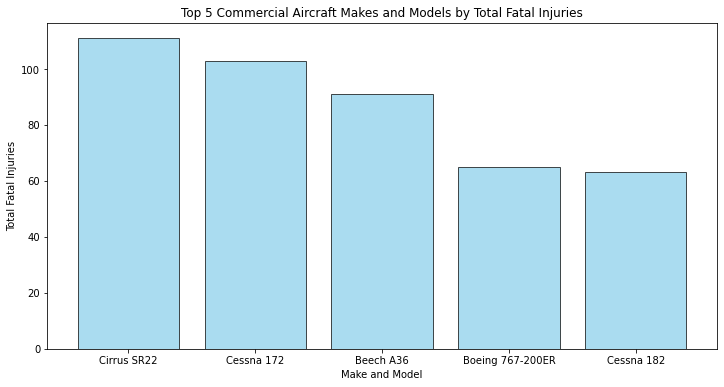

In [17]:
#Bar Chart Showing the Top 5 Make.Models by total Fatalities (All are commercial)
plt.figure(figsize=(12, 6))
plt.bar(make_model_names, fatal_injuries, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Make and Model')
plt.ylabel('Total Fatal Injuries')
plt.title('Top 5 Aircraft Makes and Models by Total Fatal Injuries')
plt.xticks(rotation=0, ha='center');

In [18]:
Commercial_Flights = df[df['Commercial'] == 'Yes']
Totaled_Commercial_Fatalities_by_Make = Commercial_Flights.groupby('Make')['Fatal'].sum()
Totaled_Commercial_Fatalities_by_Make.tail(5)
#This groups the sum of Fatal values equal to 1 based on the Make with a Commercial value of Yes 

Make
Airbus    102
Boeing    365
Name: Fatal, dtype: int32

In [22]:
Boeing_Occurances = 1215
Boeing_Fatality_Occurance = 108
Airbus_Occurances = 244
Airbus_Fatality_Occurances = 22

Boeing_Average_Fatality_Occurance = Boeing_Fatality_Occurance/Boeing_Occurances
Airbus_Average_Fatality_Occurance = Airbus_Fatality_Occurances/Airbus_Occurances

print(Boeing_Average_Fatality_Occurance)
print(Airbus_Average_Fatality_Occurance)

#we can see here that 8.8% of the time Boeing Accidents will have Fatalities
#we can see here that 9% of the time Airbus will have Fatalities

0.08888888888888889
0.09016393442622951


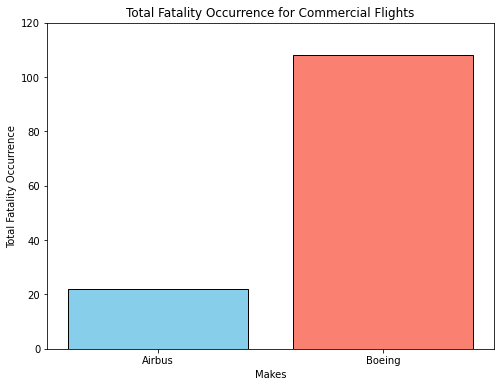

In [20]:
#Hard coding Airbus vs Boeing for the visual
makes = ["Airbus", "Boeing"]
totaled_fatalities_occurence = [22, 108]

plt.figure(figsize=(8, 6))
plt.bar(makes, totaled_fatalities_occurence, color=["skyblue", "salmon"], edgecolor='black')
plt.xlabel("Makes")
plt.ylabel("Total Fatality Occurrence")
plt.title("Total Fatality Occurrence for Commercial Flights")
plt.ylim(0, 120)
plt.yticks(range(0, 140, 20));

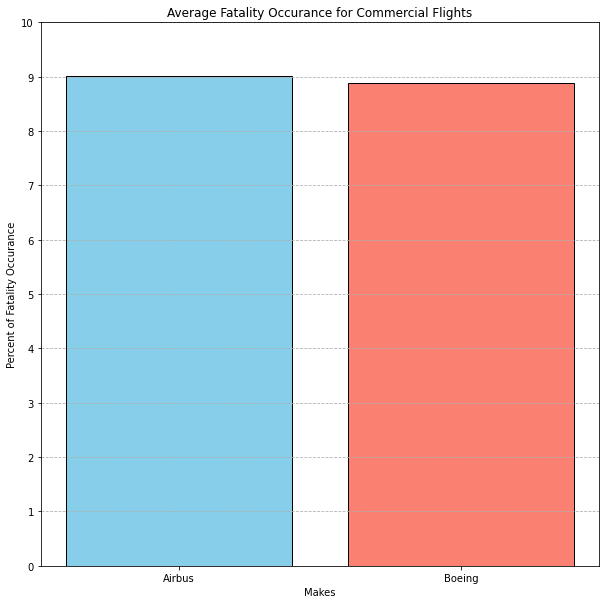

In [23]:
# We can see above that boeing has a lot more occurances of fatal accidents than Airbus. 
# But what is important is comparing the occurances of fatal accidents by the sample size. 
makes = ["Airbus", "Boeing"]
fatalities_occurance_averages = [Airbus_Average_Fatality_Occurance*100, Boeing_Average_Fatality_Occurance*100]

plt.figure(figsize=(10, 10))
plt.bar(makes, fatalities_occurance_averages, color=["skyblue", "salmon"], edgecolor='black')
plt.xlabel("Makes")
plt.ylabel("Percent of Fatality Occurance")
plt.title("Average Fatality Occurance for Commercial Flights")
plt.ylim(0, 10)
plt.yticks(range(0, 11, 1))
plt.grid(axis='y', linestyle='--');

In [ ]:
#It is difficult to see, but Airbus at 9% and Boeing is at 8.8%  
#Therefore we can recommend Boeing as the Safest Commercial Maker adjusted for the limitations in the dataset.

In [24]:
Private_Flights_Minor_Damage = df[(df['Commercial'] == 'No') & (df['Aircraft.damage'] == 'Minor')]
Private_Flights_Minor_Damage_MostCommon = Private_Flights_Minor_Damage['Make'].value_counts().nlargest(20)
#This is giving us the top 20 most commonly occuring Makes by Minor Damage so we can get the average. 

In [25]:
Private_Flights_Minor_Damage_MostCommon
#As we can see below Cessna has 94 occurences, Piper has 46 occurences, Bombardier has 32 occurences

Cessna               59
Piper                27
Beech                18
Embraer              16
Mcdonnell douglas    14
Bombardier inc       13
Cirrus               11
Bombardier            8
Raytheon              8
Dehavilland           6
Diamond               4
North american        4
Mooney                3
Taylorcraft           3
Aviat                 3
Gulfstream            3
Flight design         3
Air tractor           3
Hawker                3
Pilatus               2
Name: Make, dtype: int64

In [26]:
#Cessna occurs 7088 
#Piper occurs 3950 
#Bombardier occurs 123
#We can find average occurance of minor damages by accidents
Cessna = (91/7088) * 100
Piper = (46/3950) * 100
Bombardier = (32/123) * 100


print(Cessna)
print(Piper)
print(Bombardier)

1.2838600451467268
1.1645569620253164
26.01626016260163


In [27]:
Private_Flights_Destroyed_Damage = df[(df['Commercial'] == 'No') & (df['Aircraft.damage'] == 'Destroyed')]
Private_Flights_Minor_Destroyed_MostCommon = Private_Flights_Destroyed_Damage['Make'].value_counts().nlargest(30)

In [28]:
Private_Flights_Minor_Destroyed_MostCommon

Cessna               401
Piper                297
Beech                169
Cirrus                53
Air tractor           44
Mooney                37
Grumman               34
North american        15
Raytheon              14
Dehavilland           11
Hawker                11
Rockwell              11
Champion              10
Bellanca              10
Socata                 9
Aviat                  9
Ayres                  8
Mitsubishi             7
Maule                  7
Aeronca                7
Flight design          6
Gulfstream             6
Smith                  6
Aero commander         6
Diamond                6
American               5
Learjet                5
Pilatus                5
Aero vodochody         4
Mcdonnell douglas      4
Name: Make, dtype: int64

In [29]:
#This is going to look up Mcdonnel douglas directly
Bombardier_Destroyed = df[(df['Make'] == 'Bombardier') & (df['Aircraft.damage'] == 'Destroyed') & (df['Commercial'] == 'No')]
Total_Bomb_Destroyed = len(Bombardier_Destroyed)
Total_Bomb_Destroyed

0

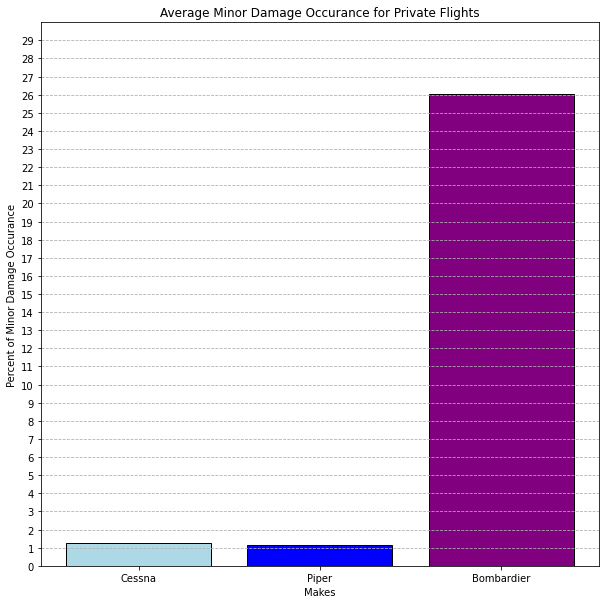

In [30]:
#Since Embraer and Mcdonnel have less than 200 entries in the data set lets only using Cessna, Piper, and Beech
makes = ["Cessna", "Piper", "Bombardier"]
minor_dmg_occurence_averages = [Cessna, Piper, Bombardier]

plt.figure(figsize=(10, 10))
plt.bar(makes, minor_dmg_occurence_averages, color=["lightblue", "blue", "purple"], edgecolor='black')
plt.xlabel("Makes")
plt.ylabel("Percent of Minor Damage Occurance")
plt.title("Average Minor Damage Occurance for Private Flights")
plt.ylim(0, 30)
plt.yticks(range(0, 30, 1))
plt.grid(axis='y', linestyle='--');

In [31]:
#now I need to calculate the averages of Destroyed data occurence
Cessna_Destroyed = (646/7088)*100
Piper_Destroyed = (430/3950)*100
Bombardier_Destroyed = (4/123)*100

print(Cessna_Destroyed)
print(Piper_Destroyed)
print(Bombardier_Destroyed)

#I notice that Cessna has the lowest average for destroyed damage types and the second highest 

9.113995485327314
10.886075949367088
3.2520325203252036


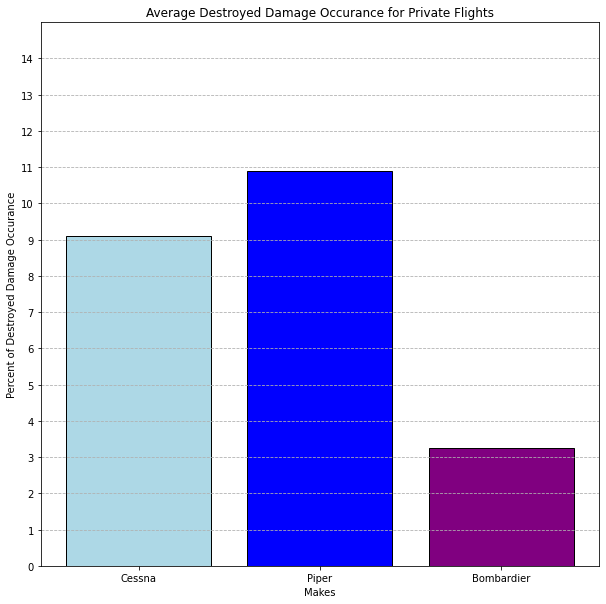

In [32]:
makes = ["Cessna", "Piper", "Bombardier"]
destroyed_dmg_occurence_averages = [Cessna_Destroyed, Piper_Destroyed, Bombardier_Destroyed]

plt.figure(figsize=(10, 10))
plt.bar(makes, destroyed_dmg_occurence_averages, color=["lightblue", "blue", "purple"], edgecolor='black')
plt.xlabel("Makes")
plt.ylabel("Percent of Destroyed Damage Occurance")
plt.title("Average Destroyed Damage Occurance for Private Flights")
plt.ylim(0, 15)
plt.yticks(range(0, 15, 1))
plt.grid(axis='y', linestyle='--');

In [33]:
#Now we gotta compared the Avearges of Minor Damage and Destroyed for Commercial Flights
Commercial_Flights_Minor_Damage = df[(df['Commercial'] == 'Yes') & (df['Aircraft.damage'] == 'Minor')]
Commercial_Flights_Minor_Damage_Totaled = Commercial_Flights_Minor_Damage['Make'].value_counts().nlargest()
Commercial_Flights_Minor_Damage_Totaled

Boeing    69
Airbus    33
Name: Make, dtype: int64

In [34]:
#Boeing has 1215 occurences in the filtered data set and 39 of those had minor damages
#Airbus has 244 occurences in the filtered data set and 6 of those had minor damages
#Lets find the averages
Boeing_Minor = (39/1215)*100
Airbus_Minor = (6/244)*100

print(Boeing_Minor)
print(Airbus_Minor)

3.2098765432098766
2.459016393442623


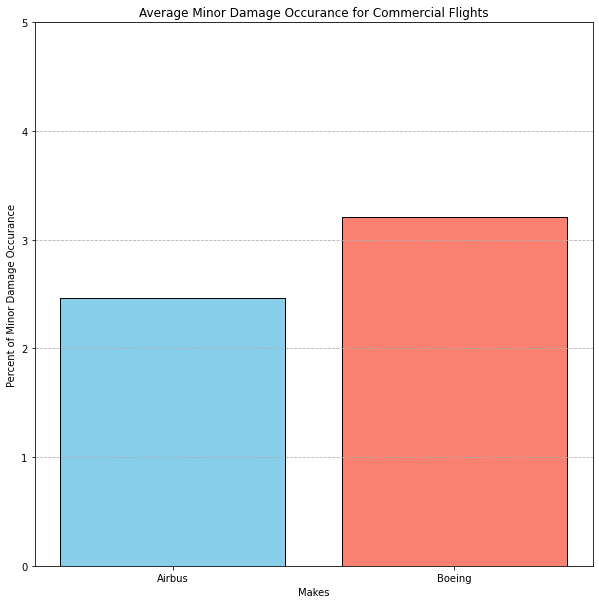

In [35]:
makes = ["Airbus", "Boeing"]
Commercial_MinorDmg_occurance_averages = [Airbus_Minor, Boeing_Minor]
plt.figure(figsize=(10, 10))
plt.bar(makes, Commercial_MinorDmg_occurance_averages, color=["skyblue", "salmon"], edgecolor='black')
plt.xlabel("Makes")
plt.ylabel("Percent of Minor Damage Occurance")
plt.title("Average Minor Damage Occurance for Commercial Flights")
plt.ylim(0, 5)
plt.yticks(range(0, 6, 1))
plt.grid(axis='y', linestyle='--');

In [36]:
Commercial_Flights_Destroyed_Damage = df[(df['Commercial'] == 'Yes') & (df['Aircraft.damage'] == 'Destroyed')]
Commercial_Flights_Destroyed_Damage_Totaled = Commercial_Flights_Destroyed_Damage['Make'].value_counts().nlargest()
Commercial_Flights_Destroyed_Damage_Totaled

Boeing    10
Airbus     1
Name: Make, dtype: int64

In [37]:
#As we can see airbus was only destroyed 1 time out of 244 while Boeing was destroyed 12 times out of 1215
Boeing_Destroyed = (12/1215) *100
Airbus_Destroyed = (1/244) *100

print(Boeing_Destroyed)
print(Airbus_Destroyed)

0.9876543209876543
0.4098360655737705


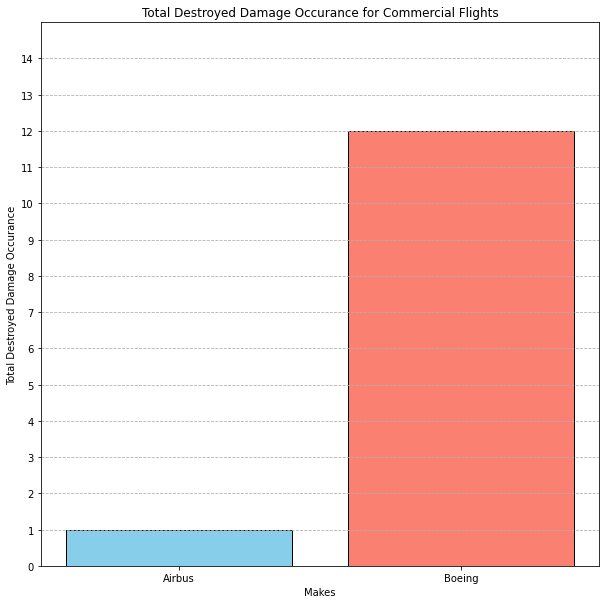

In [38]:
#Since the averages are so small I think our graph should show the number of occurences: Boeing = 12 and Airbus = 1
#The exporatory data can be left here with our description
#In the explanatory presentation we can explain what the 12 and the 1 mean

makes = ["Airbus", "Boeing"]
Commercial_DestroyedDmg_occurance_averages = [1, 12]
plt.figure(figsize=(10, 10))
plt.bar(makes, Commercial_DestroyedDmg_occurance_averages, color=["skyblue", "salmon"], edgecolor='black')
plt.xlabel("Makes")
plt.ylabel("Total Destroyed Damage Occurance")
plt.title("Total Destroyed Damage Occurance for Commercial Flights")
plt.ylim(0, 15)
plt.yticks(range(0, 15, 1))
plt.grid(axis='y', linestyle='--');